In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/winequality-red.csv')

In [ ]:
df

fixed acidity  volatile acidity  ...  quality  quality-bin
0               7.4             0.700  ...        5            0
1               7.8             0.880  ...        5            0
2               7.8             0.760  ...        5            0
3              11.2             0.280  ...        6            1
4               7.4             0.700  ...        5            0
...             ...               ...  ...      ...          ...
1594            6.2             0.600  ...        5            0
1595            5.9             0.550  ...        6            1
1596            6.3             0.510  ...        6            1
1597            5.9             0.645  ...        5            0
1598            6.0             0.310  ...        6            1

[1599 rows x 13 columns]

In [ ]:
set(df['quality'])

{3, 4, 5, 6, 7, 8}

In [ ]:
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [3]:
new = []
for x in df['quality']:
  if x < 6:
    new.append(0)
  else:
    new.append(1)

In [4]:
df['quality-bin'] = new

In [ ]:
import seaborn as sns

In [ ]:
df.corr()

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.390558  ...  0.476166  1.000000

[12 rows x 12 columns]

In [ ]:
sns.pairplot(df, hue='quality')

Output hidden; open in https://colab.research.google.com to view.

In [5]:
import random

In [6]:
rnd = [x for x in range(len(df['quality']))]
random.shuffle(rnd)
df.iloc[rnd]
df_train = df.iloc[rnd[:len(df)*80//100]]
df_test = df.iloc[rnd[len(df)*80//100:]]
y_train = df_train['quality-bin']
x_train = df_train
del x_train['quality-bin']
del x_train['quality']
y_test = df_test['quality-bin']
x_test = df_test
del x_test['quality-bin']
del x_test['quality']

In [ ]:
from sklearn.linear_model import LinearRegression # подключим модель линейной регрессии
linr = LinearRegression() # создадим ее
linr.fit(x_train, y_train) # обучим модель, принудительно переформатировав размеры массивов
print(f'Обученные параметры: b={linr.intercept_} a={linr.coef_}')

y_pred=linr.predict(x_test)# посчитаем выход модели

Обученные параметры: b=0.003152694690179203 a=[ 0.01305566 -0.5819392  -0.20291683  0.00131521 -0.77959292  0.00482221
 -0.00310222 -0.49389054 -0.17666298  0.45332373  0.16311362]


In [ ]:
s = []
y_test1 = list(y_test)
for i in range(len(y_pred)):
  if y_pred[i] < 0.5:
    s.append([0, y_test1[i]])
  else:
    s.append([1, y_test1[i]])
s.sort(key=lambda x: x[0])
new_y_pred = []
new_y_test = []
for x1, x2 in s:
  new_y_pred.append(x1)
  new_y_test.append(x2)
x = [x for x in range(len(s))]

In [ ]:
import matplotlib.pyplot as plt

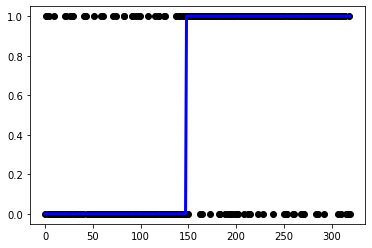

In [ ]:
plt.plot(x, new_y_pred, color='blue', linewidth=3)# нарисуем его 
plt.scatter(x, new_y_test,  color='black') # и желаемый
plt.show()

In [51]:
set(y_test)

{0, 1}

In [54]:
f1 = f1_score(new_y_test, new_y_pred, average="macro")
f1

0.7708882982375269

In [ ]:
from sklearn.linear_model import LogisticRegression # подключим модель линейной регрессии
linr = LogisticRegression() # создадим ее
linr.fit(x_train, y_train) # обучим модель, принудительно переформатировав размеры массивов
print(f'Обученные параметры: b={linr.intercept_} a={linr.coef_}')

y_pred=linr.predict(x_test)# посчитаем выход модели

Обученные параметры: b=[ 0.00626481  0.03367654  0.55926608 -0.08856442 -0.43571791 -0.0749251 ] a=[[-0.05568212  0.15654849 -0.04925427  0.17317081  0.01565503  0.01731824
  -0.05541608  0.00656448  0.0452598  -0.03301539 -0.0891897 ]
 [-0.08506644  0.26138015 -0.14006124  0.08810768 -0.00763837 -0.07428296
   0.02022391  0.03332378  0.20187458 -0.09922797 -0.0473993 ]
 [ 0.25275487  1.05293229 -0.48967416 -0.07587253  0.1331819  -0.01590734
   0.0295573   0.55313299  1.86657137 -0.46095005 -0.79122093]
 [ 0.18755286 -0.40539138  0.03677985 -0.04392153 -0.02071638  0.00981779
   0.01113116 -0.08605661 -0.24525849  0.23050686  0.12539651]
 [ 0.13888274 -0.9484945   0.58172874 -0.02633123 -0.10238183  0.0029857
   0.00560276 -0.43233879 -1.58732582  0.32112248  0.55394318]
 [-0.43844191 -0.11697504  0.06048107 -0.1151532  -0.01810036  0.06006857
  -0.01109905 -0.07462584 -0.28112145  0.04156407  0.24847023]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
from sklearn import tree # модуль для деревьев
clf = tree.DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(x_train, y_train) # обучаем его, т.е. создаем само дерево

In [56]:
y_pred=clf.predict(x_test)# посчитаем выход модели

In [ ]:
from sklearn.metrics import f1_score

In [58]:
f1 = f1_score(y_test, y_pred, average="macro")

In [59]:
f1

0.7305764411027569

In [ ]:
from sklearn.ensemble import RandomForestClassifier # случайный лес

In [60]:
# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=21,# максимальная глубина дерева
                             n_estimators=100,# число деревьев в лесу
                             max_features=11)# максимальное число признаков для каждого дерева

clf.fit(x_train, y_train) # обучаем 

y_pred = clf.predict(x_test) # проверяем на тестовых данных

f1 = f1_score(y_test, y_pred, average="macro")
f1

0.821580538192916

In [7]:
from sklearn.datasets import load_wine
#import matplotlib.pyplot as plt
from sklearn import svm 

data_wine = load_wine() # загрузим набор данных
# названия признаков
print("Features: ", data_wine.feature_names)
# название классов
print("Labels: ", data_wine.target_names)

X = data_wine.data # признаки
y = data_wine.target # цели (индексы классов)

clf = svm.SVC(kernel='linear')# создаем линейную SVM
clf.fit(x_train, y_train)# обучаем ее на обучающих данных
print('Множители',clf.coef_.shape)
print('Смещения',clf.intercept_.shape)
pred = clf.predict(x_test)# считаем классы для тестовых данных 

# функции для расчета метрик
from sklearn.metrics import f1_score # f1 мера
f1 = f1_score(y_test, pred, average="micro") # средняя f1 мера
#
print('F1=', f1)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
Множители (1, 11)
Смещения (1,)
F1= 0.759375


In [64]:

models_name = (svm.SVC(kernel='sigmoid', C=C), # сигмоидальный
          svm.LinearSVC(C=C, max_iter=10000), # линейный (альтернатива svm.SVC(kernel='linear', C=C)
          svm.SVC(kernel='rbf', gamma=0.7, C=C), # радиально-базисный
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)) # полиномиальный
models = (clf.fit(x_train, y_train) for clf in models_name) # обучаем модели
F1=(f1_score(y,clf.predict(X), average="micro") for clf in models_name) # F1 мера для них (на обучающих данных)


In [75]:
for C in [10**-7, 10**-5, 0.0001, 0.001, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 2, 4, 6, 8, 10]:
  clf = svm.SVC(kernel='sigmoid', C=C)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  f1 = f1_score(y_test, y_pred)
  print(f'{C}\t{f1}')

1e-07	0.6912065439672801
1e-05	0.6912065439672801
0.0001	0.6912065439672801
0.001	0.6912065439672801
0.05	0.5
0.1	0.4329268292682926
0.2	0.6464088397790055
0.4	0.6180758017492712
0.6	0.6239067055393587
0.8	0.621700879765396
1.0	0.621700879765396
2	0.6176470588235294
4	0.6176470588235294
6	0.6176470588235294
8	0.6135693215339233
10	0.6135693215339233


In [82]:
C = 0.001
for gamma in range(100, 200, 10):
  for C in [1]:
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    print(f'gamma={gamma}\tC={C}\tf1={f1}')

gamma=100	C=1	f1=0.7396061269146609
gamma=110	C=1	f1=0.7396061269146609
gamma=120	C=1	f1=0.7396061269146609
gamma=130	C=1	f1=0.7396061269146609
gamma=140	C=1	f1=0.7396061269146609
gamma=150	C=1	f1=0.7396061269146609
gamma=160	C=1	f1=0.7396061269146609
gamma=170	C=1	f1=0.7396061269146609
gamma=180	C=1	f1=0.7396061269146609
gamma=190	C=1	f1=0.7396061269146609


In [ ]:
C = 1
clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1 = f1_score(y_test, y_pred)
print(f'degree={degree}\tf1={f1}')

NameError: ignored

In [ ]:
clf = svm.SVC(kernel='poly', degree=5, gamma='auto', C=C)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1 = f1_score(y_test, y_pred)
print(f'degree={degree}\tf1={f1}')